##  Constructing an Optimal WIG20 Portfolio

This project focuses on constructing an optimized portfolio using historical data from companies listed in the WIG20 index. The portfolio construction process is based on the Sharpe ratio, a popular metric in finance that measures the risk-adjusted return of an investment. Additionally, Monte Carlo simulation is employed to assess the potential future performance of the selected portfolio.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from scipy.stats import norm
import seaborn as sns

%matplotlib notebook

Reading CSV files from a specified folder, extracts the 'Zamkniecie'(Close Price) column from each file,and merges them into a single data frame called data.

In [2]:
# Reading CSV files from a specified folder, extracts the 'Zamkniecie'(Close Price) column from each file,
# and merges them into a single data frame called data.

folder_path = r'C:\Users\chceg\Downloads\stocksData'
file_extension = '*.csv'
full_folder_path = os.path.abspath(folder_path)
files = glob.glob(os.path.join(full_folder_path, file_extension))

dataframes = []

for file in files:
    df = pd.read_csv(file,index_col=0, parse_dates=True)
    dataframes.append(df['Zamkniecie'])
    
data = pd.concat(dataframes, axis=1)

This code extracts ticker symbols from file names, stores them in the ticker list, and then assigns the ticker symbols as column names in the data DataFrame. Each ticker symbol is a column header in the data DataFrame.

In [3]:
#This code extracts ticker symbols from file names, stores them in the ticker list, and then assigns the ticker symbols as column names in the data DataFrame.
Each ticker symbol is a column header in the data DataFrame.
ticker = []
for i in files:
    print(i[-9:-6].upper())
    ticker.append(i[-9:-6].upper())
data.columns = ticker

ACP
ALE
ALR
CDR
CPS
DNP
JSW
KGH
KRU
KTY
LPP
MBK
OPL
PCO
PEO
PGE
PKN
PKO
PZU
SPL


In [4]:
# select data for a 5-year period
data =data["2018-05-19":]

In [5]:
data

,ACP,ALE,ALR,CDR,CPS,DNP,JSW,KGH,KRU,KTY,LPP,MBK,OPL,PCO,PEO,PGE,PKN,PKO,PZU,SPL
Data,,,,,,,,,,,,,,,,,,,,
2018-05-21,33.7220,NaN,73.00,140.748,21.5661,103.6,81.790,90.6126,203.64,243.568,8560.68,430.43,4.91784,NaN,92.1213,10.300,71.5669,36.8682,29.0391,334.769
2018-05-22,33.9702,NaN,72.90,140.273,21.0250,105.8,82.547,90.3816,204.36,245.257,8606.71,432.80,4.81259,NaN,91.4434,10.140,69.1079,36.6270,28.8904,334.016
2018-05-23,32.9802,NaN,72.00,138.452,21.2291,102.9,78.193,89.1301,204.54,238.161,8371.99,431.80,4.78389,NaN,91.2782,9.470,68.6432,35.8004,27.9516,331.255
2018-05-24,33.4747,NaN,70.00,138.551,21.0250,108.8,78.477,90.0155,206.33,236.800,8615.91,437.40,4.77432,NaN,91.2045,9.510,70.2701,34.6264,28.3913,333.106
2018-05-25,33.5903,NaN,70.70,138.551,21.7683,112.0,78.571,87.9175,207.05,241.202,8740.18,435.20,4.64994,NaN,90.9600,9.120,69.8884,34.9997,28.3318,334.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-15,87.3000,35.780,42.22,114.400,17.7200,420.0,41.700,116.2000,373.00,569.500,12960.00,339.90,7.51800,39.96,95.6800,7.400,63.8100,31.3700,39.2300,328.200
2023-05-16,87.7500,36.350,42.30,111.200,18.1200,424.2,40.760,114.8000,371.40,576.000,12980.00,345.80,7.58400,41.00,96.6000,7.482,63.5100,31.6300,39.6600,328.000
2023-05-17,87.7500,36.440,41.93,109.150,17.1750,421.0,40.130,113.1000,365.00,573.500,12750.00,341.10,7.38200,40.38,96.6600,7.060,63.4300,31.6700,39.6500,326.000


In [6]:
# Ejecting Columns that do not have enough data (Allegro,Pepco Group)
data = data.dropna(axis=1)


In [7]:
data

,ACP,ALR,CDR,CPS,DNP,JSW,KGH,KRU,KTY,LPP,MBK,OPL,PEO,PGE,PKN,PKO,PZU,SPL
Data,,,,,,,,,,,,,,,,,,
2018-05-21,33.7220,73.00,140.748,21.5661,103.6,81.790,90.6126,203.64,243.568,8560.68,430.43,4.91784,92.1213,10.300,71.5669,36.8682,29.0391,334.769
2018-05-22,33.9702,72.90,140.273,21.0250,105.8,82.547,90.3816,204.36,245.257,8606.71,432.80,4.81259,91.4434,10.140,69.1079,36.6270,28.8904,334.016
2018-05-23,32.9802,72.00,138.452,21.2291,102.9,78.193,89.1301,204.54,238.161,8371.99,431.80,4.78389,91.2782,9.470,68.6432,35.8004,27.9516,331.255
2018-05-24,33.4747,70.00,138.551,21.0250,108.8,78.477,90.0155,206.33,236.800,8615.91,437.40,4.77432,91.2045,9.510,70.2701,34.6264,28.3913,333.106
2018-05-25,33.5903,70.70,138.551,21.7683,112.0,78.571,87.9175,207.05,241.202,8740.18,435.20,4.64994,90.9600,9.120,69.8884,34.9997,28.3318,334.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-15,87.3000,42.22,114.400,17.7200,420.0,41.700,116.2000,373.00,569.500,12960.00,339.90,7.51800,95.6800,7.400,63.8100,31.3700,39.2300,328.200
2023-05-16,87.7500,42.30,111.200,18.1200,424.2,40.760,114.8000,371.40,576.000,12980.00,345.80,7.58400,96.6000,7.482,63.5100,31.6300,39.6600,328.000
2023-05-17,87.7500,41.93,109.150,17.1750,421.0,40.130,113.1000,365.00,573.500,12750.00,341.10,7.38200,96.6600,7.060,63.4300,31.6700,39.6500,326.000


In [8]:
# creating log_returns for future calculations

log_returns = np.log(data/data.shift())

In [9]:
log_returns

,ACP,ALR,CDR,CPS,DNP,JSW,KGH,KRU,KTY,LPP,MBK,OPL,PEO,PGE,PKN,PKO,PZU,SPL
Data,,,,,,,,,,,,,,,,,,
2018-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-22,0.007333,-0.001371,-0.003381,-0.025410,0.021013,0.009213,-0.002553,0.003529,0.006910,0.005363,0.005491,-0.021634,-0.007386,-0.015656,-0.034964,-0.006564,-0.005134,-0.002252
2018-05-23,-0.029576,-0.012423,-0.013067,0.009661,-0.027793,-0.054188,-0.013944,0.000880,-0.029360,-0.027651,-0.002313,-0.005981,-0.001808,-0.068359,-0.006747,-0.022827,-0.033035,-0.008300
2018-05-24,0.014883,-0.028171,0.000715,-0.009661,0.055754,0.003625,0.009885,0.008713,-0.005731,0.028719,0.012886,-0.002002,-0.000808,0.004215,0.023424,-0.033343,0.015608,0.005572
2018-05-25,0.003447,0.009950,0.000000,0.034743,0.028988,0.001197,-0.023583,0.003483,0.018419,0.014320,-0.005042,-0.026397,-0.002684,-0.041874,-0.005447,0.010723,-0.002098,0.002728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-15,-0.017599,-0.027565,-0.003926,-0.001692,0.005491,0.019127,0.013429,-0.011727,0.002637,0.003091,-0.029567,-0.010848,-0.002088,0.013332,0.008657,0.000638,-0.005592,-0.011512
2023-05-16,0.005141,0.001893,-0.028371,0.022322,0.009950,-0.022800,-0.012121,-0.004299,0.011349,0.001542,0.017209,0.008741,0.009569,0.011020,-0.004713,0.008254,0.010901,-0.000610
2023-05-17,0.000000,-0.008786,-0.018607,-0.053561,-0.007572,-0.015577,-0.014919,-0.017382,-0.004350,-0.017878,-0.013685,-0.026996,0.000621,-0.058055,-0.001260,0.001264,-0.000252,-0.006116


### Monte Carlo simulation to select the best portfolio
In the Monte Carlo simulation, I will generate a large number of random portfolios by assigning different weights to the assets in the portfolio. Each portfolio will have a unique combination of asset weights. For each portfolio, I will calculate the expected return, volatility, and Sharpe ratio.

By simulating a large number of portfolios, I will be able to identify the portfolio that maximizes the Sharpe ratio. This portfolio will represent the optimal allocation of assets that provides the highest risk-adjusted return.

In [10]:
# Monte Carlo Simulation
n = 1000000

weights = np.zeros((n, 18))
exp_returns = np.zeros(n)
exp_volatilities = np.zeros(n)
sharpe_ratios = np.zeros(n)

for i in range(n):
    weight = np.random.random(18)
    weight /= np.sum(weight)
    weights[i] = weight
    
    exp_returns[i] = np.sum(log_returns.mean()*weight)*252
    exp_volatilities[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_returns[i] / exp_volatilities[i]

<IPython.core.display.Javascript object>


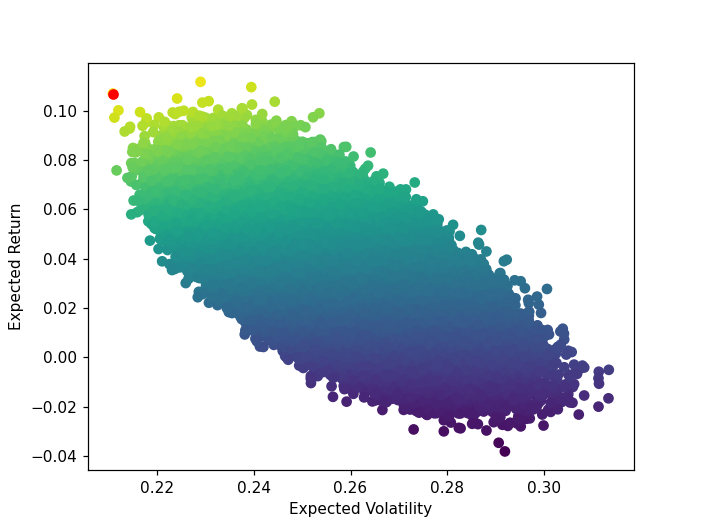

Text(0, 0.5, 'Expected Return')

In [11]:
fig, ax = plt.subplots()
ax.scatter(exp_volatilities, exp_returns, c=sharpe_ratios)
ax.scatter(exp_volatilities[sharpe_ratios.argmax()], exp_returns[sharpe_ratios.argmax()], c='r')
ax.set_xlabel("Expected Volatility")
ax.set_ylabel("Expected Return")

In [12]:
#The Sharpe ratio of the best model
sharpe_ratios.max()

0.507643103846159

In [13]:
sharpe_ratios.argmax()

501870

In [14]:
# assigning the best weights

portfolio =weights[sharpe_ratios.argmax()]

In [45]:
for i in range(18):
    h = round(portfolio[i]*100,2)
    print("Invest a "+ str(h) + "% of portfolio in " + data.columns[i]+ " stocks")
    

Invest a 13.93% of portfolio in ACP stocks
Invest a 0.74% of portfolio in ALR stocks
Invest a 2.78% of portfolio in CDR stocks
Invest a 4.64% of portfolio in CPS stocks
Invest a 13.02% of portfolio in DNP stocks
Invest a 2.3% of portfolio in JSW stocks
Invest a 1.95% of portfolio in KGH stocks
Invest a 4.91% of portfolio in KRU stocks
Invest a 12.53% of portfolio in KTY stocks
Invest a 5.61% of portfolio in LPP stocks
Invest a 1.01% of portfolio in MBK stocks
Invest a 10.72% of portfolio in OPL stocks
Invest a 1.23% of portfolio in PEO stocks
Invest a 0.21% of portfolio in PGE stocks
Invest a 5.23% of portfolio in PKN stocks
Invest a 4.92% of portfolio in PKO stocks
Invest a 13.77% of portfolio in PZU stocks
Invest a 0.5% of portfolio in SPL stocks


In [15]:
data3 = data/data.iloc[0]

In [16]:
# Investing 100,000 in this portfolio 5 years ago would yield the following results."
np.sum(data3*portfolio*100000, axis=1).iloc[-1]

195355.8497299723

<IPython.core.display.Javascript object>


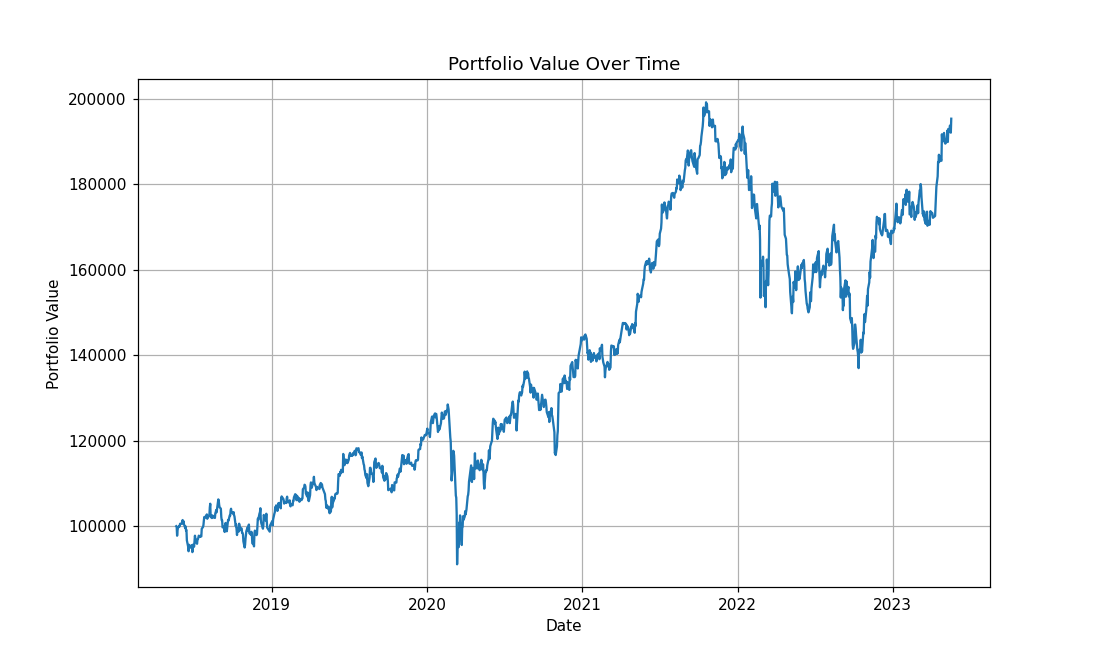

In [17]:
portfolio_value = np.sum(data3 * portfolio * 100000, axis=1).iloc[-1]

plt.figure(figsize=(10, 6))
plt.plot(data3.index, np.sum(data3 * portfolio * 100000, axis=1))
plt.title("Portfolio Value Over Time")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.show()

### Predicting Future Portfolio Value
Now, utilizing the Monte Carlo simulation, I will endeavor to predict the future value of the portfolio in the upcoming year. I will incorporate the concept of Brownian Motion and assume that there are 252 trading days in a year.

Brownian Motion is a stochastic process commonly employed to model the random behavior of financial assets. It consists of two main components: drift and volatility. The drift represents the expected return of the portfolio based on historical data, while volatility accounts for the random fluctuations around the drift.

By running the Monte Carlo simulation with a large number of iterations, I will generate a range of possible future values for the portfolio. This approach takes into account the uncertainty and randomness inherent in financial markets.

In [47]:
log_returns= data['Log return']

<IPython.core.display.Javascript object>


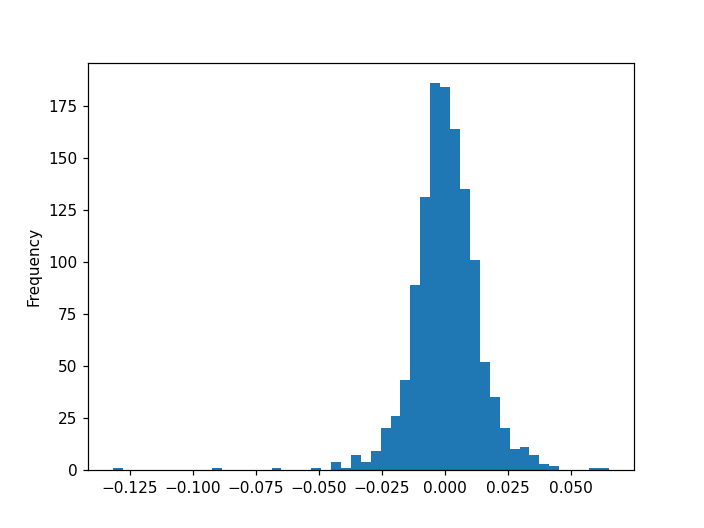

<AxesSubplot:ylabel='Frequency'>

In [48]:
fig, ax = plt.subplots()
data['Log return'].plot(kind='hist', bins=50, ax=ax)

Looking at this histogram, we can see how the value of the portfolio changed throughout the day.

In [49]:
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5*var)

In [50]:
stdev = log_returns.std()
days = 252
trials = 10000
Z = norm.ppf(np.random.rand(days, trials)) #days, trials
daily_returns = np.exp(drift + stdev * Z)

In [24]:
price_paths = np.zeros_like(daily_returns)
price_paths[0] = 100000
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]

<IPython.core.display.Javascript object>


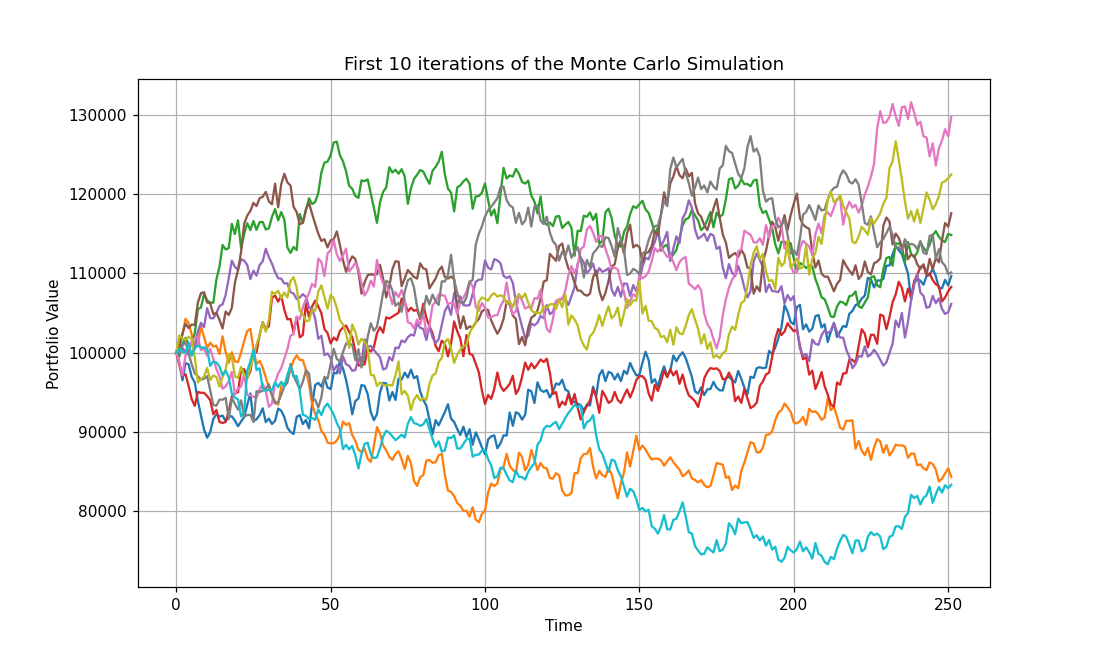

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(price_paths[:, :10])
plt.title("First 10 iterations of the Monte Carlo Simulation")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


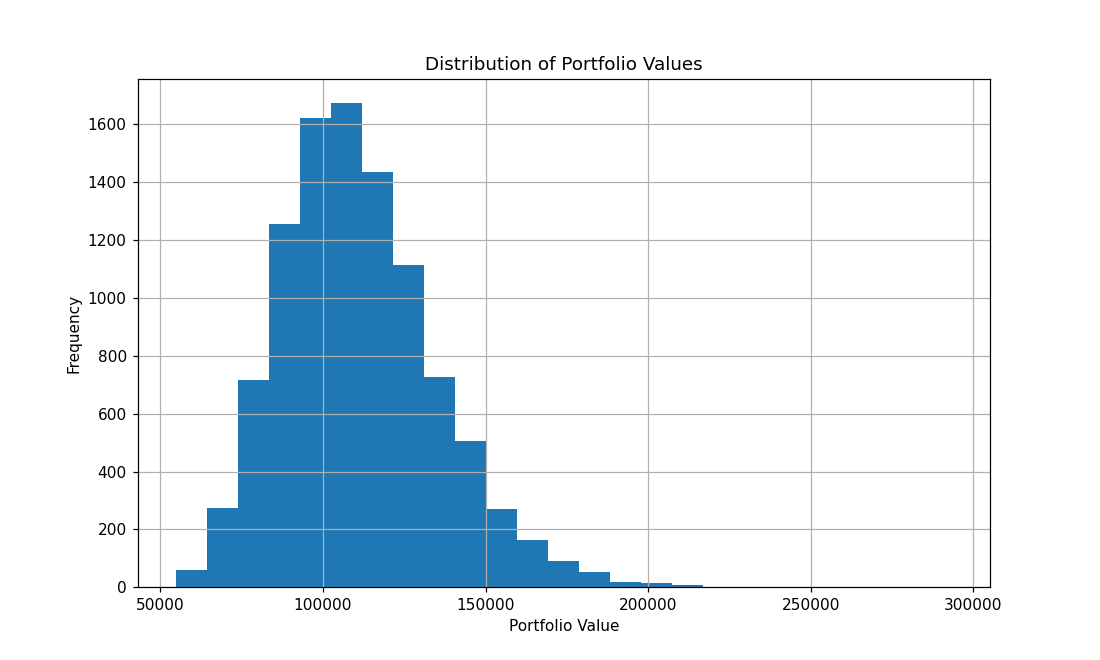

In [26]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(price_paths[-1], bins=25)
plt.title("Distribution of Portfolio Values")
plt.xlabel("Portfolio Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [31]:
#Average forecasted portfolio value after a year
price_paths[-1].mean()

111198.17375581284